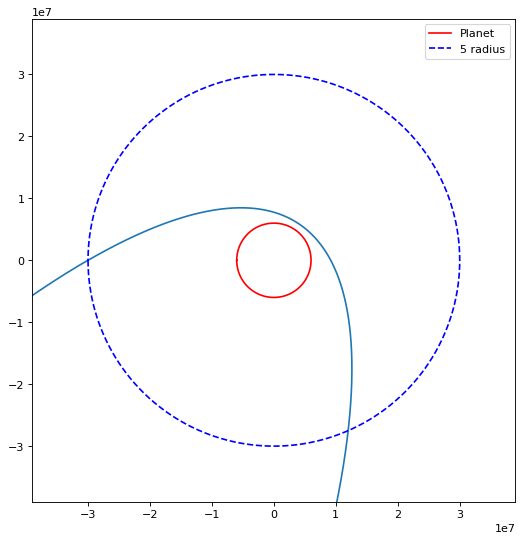

In [3]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67*10**(-11)
mEarth = 6*10**(24)
rEarth = 6*10**6
r0 = 5*rEarth
v0 = 0.5*10**4

sinTheta0 = 0.5

def ConstantC(sinTheta0, v):
    return r0*v*sinTheta0

def excentricity(C, v):
    return np.sqrt(1+(0.5*v**2-G*mEarth/r0)*2*C**2/(G**2*mEarth**2))

def defineConstants(sinTheta0, v):
    C = ConstantC(sinTheta0, v)
    p = C**2/(G*mEarth)
    e = excentricity(C, v)
    return C, p, e

def findIndexTheta0(Radius):
    movedRadius = np.abs(Radius - r0)
    return np.where(movedRadius == min(movedRadius))[0]

def radius(p, e, theta):
    Radius = p/(1+e*np.cos(theta))
    Radius = np.roll(Radius, findIndexTheta0(Radius))
    return Radius

Theta = np.linspace(np.pi, 3*np.pi, 10000)

EarthX = rEarth*np.cos(Theta)
EarthY = rEarth*np.sin(Theta)

def plotFigure(ListXY):
    plt.figure(figsize=(8,8), dpi = 80)
    for xy in ListXY:
        x, y = xy
        plt.plot(x, y)
    plt.plot(EarthX, EarthY, color = 'red', label = 'Planet')
    plt.plot(5*EarthX, 5*EarthY, '--b', label = '5 radius')
    plt.xlim(-1.3*r0, 1.3*r0)
    plt.ylim(-1.3*r0, 1.3*r0)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

C, p, e = defineConstants(sinTheta0, v0)

Radius = radius(p, e, Theta)

x = Radius*np.cos(Theta)
y = Radius*np.sin(Theta)

plotFigure([[x, y]])


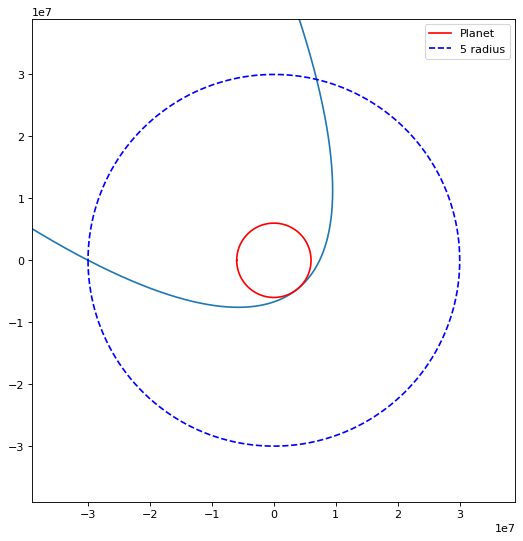

In [4]:
sinTheta0 = (1/5)*np.sqrt(8*G*mEarth/(5*rEarth*v0**2)+1)
C, p, e = defineConstants(sinTheta0, v0)

Theta = np.linspace(np.pi, 3*np.pi, 10000)
Radius = radius(p, e, Theta)

x = Radius*np.cos(Theta)
y = Radius*np.sin(Theta)

plotFigure([[x, y]])

2319.5832959104246 0.6806666666666664
3321.2215373262898 0.765375
4322.859778742155 0.8801666666666668
5324.498020158019 1.0250416666666666
6326.136261573884 1.2


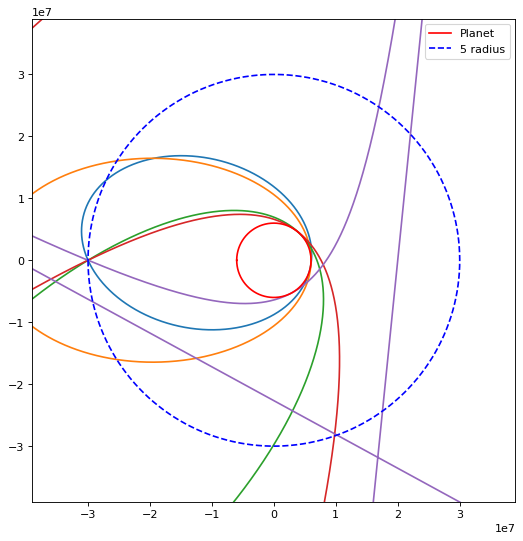

In [15]:
vMin = np.sqrt(G*mEarth/(rEarth*15))
vRange = np.linspace(1.1*vMin, 3*vMin, 5)
ListXY = []
for v in vRange:
    sinTheta0 = (1/5)*np.sqrt(8*G*mEarth/(5*rEarth*v**2)+1)
    C, p, e = defineConstants(sinTheta0, v)
    print(v, e)
    Theta = np.linspace(np.pi, 3*np.pi, 10000)
    Radius = radius(p, e, Theta)

    x = Radius*np.cos(Theta)
    y = Radius*np.sin(Theta)
    ListXY += [[x, y]]

plotFigure(ListXY)

In [8]:
findIndexTheta0(Radius)

array([9998, 9999])